In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# import data UMikro kecil dan menengah untuk clustering
pd.set_option('display.max_columns', None)
df = pd.read_excel('/content/sample_data/umikro.xlsx')
df.head(20)

,Total UMikroKecil,UMenengah
0,5,1
1,0,0
2,0,0
3,6,0
4,15,0
5,16,0
6,6,0
7,0,0
8,16,0
9,30,1


In [ ]:
# Library untuk clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
scaler = StandardScaler()
scale_std = scaler.fit_transform(df)
df_scl = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

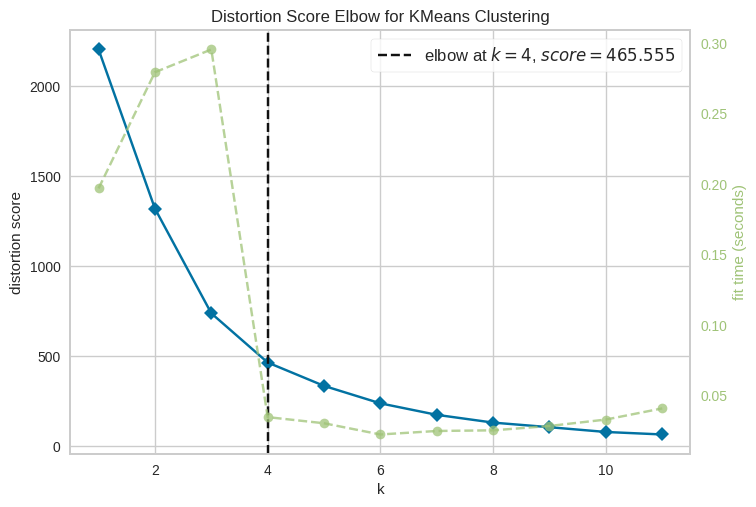

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(df_scl)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
model = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=100,
    tol=1e-3,
    random_state=42,
    )
model.fit(df_scl)

KMeans(max_iter=100, n_clusters=4, n_init=10, random_state=42, tol=0.001)

In [ ]:
df['kelas'] = model.labels_

In [ ]:
result_dict = df.groupby('kelas')[['Total UMikroKecil', 'UMenengah']].mean()
result_dict

,Total UMikroKecil,UMenengah
kelas,,
0,3.417409,0.364985
1,243.142857,4.714286
2,54.172840,5.049383
3,93.000000,132.333333


In [ ]:
map= {0:'Tertinggal', 1:'Transisi', 2: 'Berkembang', 3:'Maju'}
df['kelas']=df['kelas'].map(map)

,Total UMikroKecil,UMenengah,kelas
0,5,1,Tertinggal
1,0,0,Tertinggal
2,0,0,Tertinggal
3,6,0,Tertinggal
4,15,0,Tertinggal
...,...,...,...
1097,0,0,Tertinggal
1098,0,0,Tertinggal
1099,0,0,Tertinggal
1100,0,0,Tertinggal


In [ ]:
from google.colab import files

In [ ]:
df.to_excel('umikro.xlsx')
files.download('umikro.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
#import kolom TTG untuk clustering
pd.set_option('display.max_columns', None)
df = pd.read_excel('/content/sample_data/ttg.xlsx')
df.head(20)

,Mayoritas_TTG_Perikanan,Jlh_alat_mayoritas_Perikanan,Mayoritas_TTG_Pertanian,Jlh_alat_mayoritas_Pertanian,Mayoritas_TTG_Perternakan,Jlh_alat_mayoritas_Perternakan
0,Bukan Desa Perikanan,0,Alat penanam lainnya,0,Masih Manual,0
1,Bukan Desa Perikanan,0,Traktor,4,Kandang Ternak,0
2,Bukan Desa Perikanan,0,Alat pertanian traditional lainnya,2,Kandang Ternak,0
3,Bukan Desa Perikanan,0,Traktor,1,Kandang Ternak,3
4,Bukan Desa Perikanan,0,Alat pertanian traditional lainnya,0,Alat Peternakan Tradisional Lainnya,0
5,Bukan Desa Perikanan,0,Masih Manual,0,Masih Manual,0
6,Bukan Desa Perikanan,0,Traktor,3,Kandang Ternak,4
7,Bukan Desa Perikanan,0,Masih Manual,0,Kandang Ternak,0
8,Bukan Desa Perikanan,0,Traktor,4,Masih Manual,0
9,Rumpon,0,Traktor,4,Kandang Ternak,5


In [ ]:
df['Mayoritas_TTG_Perikanan'].unique()

array(['Bukan Desa Perikanan', 'Rumpon', 'Masih Manual',
       'Dermaga Perinakan', 'Kolam Ikan Air Tawar',
       'Alat Perikanan Tradisional Lainnya',
       'Alat Perikanan Modern Lainnya', 'Alat Pengupas Sisik',
       'Tempat Pelelangan Ikan', 'Keramba Apung', 'Cold Storage',
       'Alat Penghancur'], dtype=object)

In [ ]:
df['Mayoritas_TTG_Perternakan'].unique()

array(['Masih Manual', 'Kandang Ternak',
       'Alat Peternakan Tradisional Lainnya', 'Alat Pencacah',
       'Alat Peternakan Modern Lainnya', 'Bukan Desa Peternakan',
       'Alat Pemerah Susu', 'Alat Penetas', 'Rumah Potong Hewan'],
      dtype=object)

In [ ]:
df1['encoded_data1'] = label_encoder.fit_transform(df1[data1])
print(df1)

               Mayoritas_TTG_Perikanan  encoded_data1
0                 Bukan Desa Perikanan              4
1                               Rumpon             10
2                         Masih Manual              9
3                    Dermaga Perinakan              6
4                 Kolam Ikan Air Tawar              8
5   Alat Perikanan Tradisional Lainnya              3
6        Alat Perikanan Modern Lainnya              2
7                  Alat Pengupas Sisik              1
8               Tempat Pelelangan Ikan             11
9                        Keramba Apung              7
10                        Cold Storage              5
11                     Alat Penghancur              0


<ipython-input-68-bbc83637ce2f>:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  df1['encoded_data1'] = label_encoder.fit_transform(df1[data1])
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df2['encoded_data2'] = label_encoder.fit_transform(df2[data2])
print(df2)

                   Mayoritas_TTG_Pertanian  encoded_data2
0                     Alat penanam lainnya              2
1                                  Traktor             10
2       Alat pertanian traditional lainnya              5
3                             Masih Manual              7
4   Penggilingan Beras (Rice Milling Unit)              8
5            Alat pertanian modern lainnya              4
6                        Alat pemanen padi              0
7                 Perontok Padi (Thresher)              9
8              Alat pengolah tanah lainnya              3
9                      Alat penanam jagung              1
10                    Bukan Desa Pertanian              6


<ipython-input-67-68afe1863736>:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  df2['encoded_data2'] = label_encoder.fit_transform(df2[data2])
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df3['encoded_data3'] = label_encoder.fit_transform(df3[data3])
print(df3)

             Mayoritas_TTG_Perternakan  encoded_data3
0                         Masih Manual              7
1                       Kandang Ternak              6
2  Alat Peternakan Tradisional Lainnya              4
3                        Alat Pencacah              1
4       Alat Peternakan Modern Lainnya              3
5                Bukan Desa Peternakan              5
6                    Alat Pemerah Susu              0
7                         Alat Penetas              2
8                   Rumah Potong Hewan              8


<ipython-input-69-038c2ec796bd>:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  df3['encoded_data3'] = label_encoder.fit_transform(df3[data3])
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Cat= df[['Mayoritas_TTG_Perternakan', 'Mayoritas_TTG_Perikanan', 'Mayoritas_TTG_Pertanian']]
from sklearn.preprocessing import LabelEncoder
Cat = Cat.apply(LabelEncoder().fit_transform)

In [ ]:
df= df.drop(Cat.columns, axis= 1)
df= pd.concat([df, Cat], axis= 1)
df.head()

,Jlh_alat_mayoritas_Perikanan,Jlh_alat_mayoritas_Pertanian,Jlh_alat_mayoritas_Perternakan,Mayoritas_TTG_Perternakan,Mayoritas_TTG_Perikanan,Mayoritas_TTG_Pertanian
0,0,0,0,7,4,2
1,0,4,0,6,4,10
2,0,2,0,6,4,5
3,0,1,3,6,4,10
4,0,0,0,4,4,5


In [ ]:
scaler = StandardScaler()
scale_std = scaler.fit_transform(df)
df_scl = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

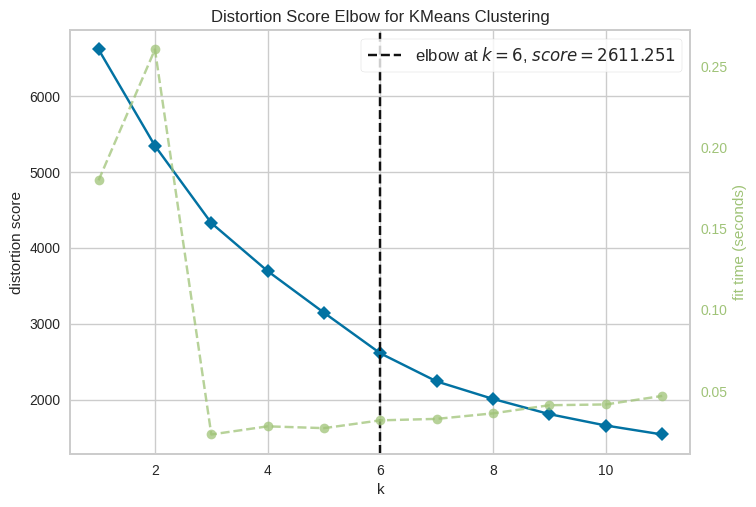

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(df_scl)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
model = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=100,
    tol=1e-3,
    random_state=42,
    )
model.fit(df_scl)

KMeans(max_iter=100, n_clusters=3, n_init=10, random_state=42, tol=0.001)

In [ ]:
df['kategori'] = model.labels_

In [ ]:
result_dict = df.groupby('kategori')[['Jlh_alat_mayoritas_Perikanan', 'Jlh_alat_mayoritas_Pertanian', 'Jlh_alat_mayoritas_Perternakan', 'Mayoritas_TTG_Perternakan',
                                      'Mayoritas_TTG_Perikanan', 'Mayoritas_TTG_Pertanian']].mean()
result_dict

,Jlh_alat_mayoritas_Perikanan,Jlh_alat_mayoritas_Pertanian,Jlh_alat_mayoritas_Perternakan,Mayoritas_TTG_Perternakan,Mayoritas_TTG_Perikanan,Mayoritas_TTG_Pertanian
kategori,,,,,,
0,35.257143,100.514286,54.000000,6.085714,5.800000,7.857143
1,4.449239,6.868020,1.614213,4.738579,4.228426,5.550761
2,1.744428,4.897474,1.208024,6.601783,7.867756,7.745914


In [ ]:
map= {0:'Memadai', 1:'Belum Memadai', 2: 'Cukup Memadai'}
df['kategori']=df['kategori'].map(map)

In [ ]:
df

,Jlh_alat_mayoritas_Perikanan,Jlh_alat_mayoritas_Pertanian,Jlh_alat_mayoritas_Perternakan,Mayoritas_TTG_Perternakan,Mayoritas_TTG_Perikanan,Mayoritas_TTG_Pertanian,kategori
0,0,0,0,7,4,2,Belum Memadai
1,0,4,0,6,4,10,Cukup Memadai
2,0,2,0,6,4,5,Belum Memadai
3,0,1,3,6,4,10,Cukup Memadai
4,0,0,0,4,4,5,Belum Memadai
...,...,...,...,...,...,...,...
1097,2,6,0,7,3,5,Belum Memadai
1098,2,6,0,7,3,5,Belum Memadai
1099,2,6,0,7,3,5,Belum Memadai
1100,2,6,0,7,3,5,Belum Memadai


In [ ]:
df.to_excel('ttg.xlsx')
files.download('ttg.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df.isnull().sum()

KODE PROV              0
NAMA PROVINSI          0
KODE KAB               0
NAMA KABUPATEN         0
KODE KEC               0
                      ..
TransUmum              0
TransUmum_Darat       84
TransUmum_Air/Laut    84
TransUmum_Udara       85
Kualitas_jalan         0
Length: 142, dtype: int64

In [ ]:
modus = df['TransUmum_Darat'].mode()
modus
df['TransUmum_Darat'].fillna(df['TransUmum_Darat'].mode()[0],inplace = True)

In [ ]:
modus = df['TransUmum_Air/Laut'].mode()
modus
df['TransUmum_Air/Laut'].fillna(df['TransUmum_Air/Laut'].mode()[0],inplace = True)

In [ ]:
modus = df['TransUmum_Udara'].mode()
modus
df['TransUmum_Udara'].fillna(df['TransUmum_Udara'].mode()[0],inplace = True)

In [ ]:
df.isnull().sum()

KODE PROV             0
NAMA PROVINSI         0
KODE KAB              0
NAMA KABUPATEN        0
KODE KEC              0
                     ..
TransUmum             0
TransUmum_Darat       0
TransUmum_Air/Laut    0
TransUmum_Udara       0
Kualitas_jalan        0
Length: 142, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Columns: 142 entries, KODE PROV to Kualitas_jalan
dtypes: float64(102), int64(12), object(28)
memory usage: 1.2+ MB
